In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline  

In [29]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/playstore/googleplaystore.csv')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [31]:
df.dropna(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Object타입 Integer형으로 변경**

In [34]:
CategoryString = df["Category"]
categoryVal = df['Category'].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0, categoryValCount):
  category_dict[categoryVal[i]] = i
df['Category_c'] = df['Category'].map(category_dict).astype(int)

# **size조정**

In [35]:
def change_size(size):
  if 'M' in size:
    x = size[:-1]
    x = float(x) * 1000000
    return(x)
  elif 'K' == size[-1:]:
    x = size[:-1]
    x = float(x) * 1000
    return(x)
  else:
    return None

df['Size'] = df['Size'].map(change_size)

df.Size.fillna(method = 'ffill', inplace = True)


# **Installs 조정**

In [36]:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

# **paid/free 를 binary로**

In [37]:
def type_cat(types):
  if types == 'Free':
    return 0
  else:
    return 1

df['Type'] = df['Type'].map(type_cat)


# **Content Rating 조정**

In [38]:
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
  RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

# **필요없다 생각되는 컬럼 삭제**

In [39]:
df.drop(labels = ['Last Updated', 'Current Ver', 'Android Ver', 'App'], axis = 1, inplace = True)


# **Genre 조정**

In [40]:
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
  GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

# **Price 조정**

In [41]:
def price_clean(price):
  if price == '0':
    return 0
  else:
    price = price[1:]
    price = float(price)
    return price

df['Price'] = df['Price'].map(price_clean).astype(float)

# **Reviews 조정**

In [42]:
df['Reviews'] = df['Reviews'].astype(int)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int64  
 10  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


In [44]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


# **Category Dummy 형식으로**

In [51]:
df2 = pd.get_dummies(df, columns=['Category'])

In [52]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
def Evaluationmatrix(y_true, y_predict):
  print('Mean Squared Error : ' + str(metrics.mean_squared_error(y_true,y_predict)))
  print('Mean absolute Error : ' + str(metrics.mean_absolute_error(y_true, y_predict)))
  print('Mean Squared Log Error : ' + str(metrics.mean_squared_log_error(y_true,y_predict)))


In [48]:
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
  dict_matrix = {}
  dict_matrix['Series Name'] = name
  dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
  dict_matrix['Mean absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
  dict_matrix['Mean squared Log Error'] = metrics.mean_squared_log_error(y_true, y_predict)
  return dict_matrix

In [54]:
from sklearn.linear_model import LinearRegression

# Integer Encoding
X = df.drop(labels = ['Category', 'Rating', 'Genres', 'Genres_c'], axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

# Creation of results dataframe and addition of first entry

resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test, Results), orient = 'index')
resultsdf = resultsdf.transpose()

# dummy Encoding

X_d = df2.drop(labels = ['Rating','Genres', 'Category_c', 'Genres_c'], axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

# adding results into results DataFrame
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear-Dummy'), ignore_index = True)


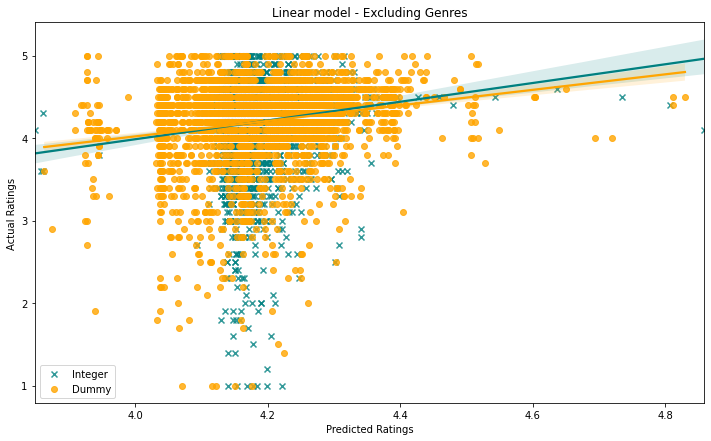

In [55]:
plt.figure(figsize =(12,7))
sns.regplot(Results, y_test, color='teal', label = 'Integer', marker='x')
sns.regplot(Results_d,y_test_d,color='orange', label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [57]:
print('Actual mean of population : '+ str(y.mean()))
print('Integer Encoding(mean) : ' + str(Results.mean()))
print('Dummy Encoding(mean) ' + str(Results_d.mean()))
print('Integer Encoding(std)' + str(Results.std()))
print('Dummy Encoding(std)' + str(Results_d.std()))

Actual mean of population : 4.191837606837612
Integer Encoding(mean) : 4.18891281633363
Dummy Encoding(mean) 4.191407573488077
Integer Encoding(std)0.054056584632561556
Dummy Encoding(std)0.10378858350637579
